<a href="https://colab.research.google.com/github/iamVedanta/pytorch-basics/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#Create a modle class that inherits nn.Module
class Model(nn.Module):
#Input layer(4 features of the flower) -->Hidden Layer1 (number of neurons ) --> H2 (n)--> output (3 classes of iris flowers)
  def __init__(self,in_features=4, h1=8, h2=9, out_features=3): #input features are 4, number of neurons is 8 for hidden layer 1 and 9 for layer 2 , it has been put randomly
    super().__init__() #instantiate our nn.Module
    self.fc1  = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) #if the number is less than0 then the func considers as zero else its the number iteself
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [4]:
#Pick a manual seed for randomization
# https://sahilchachra.medium.com/paper-summary-torch-manual-seed-3407-is-all-you-need-9ef0f7aa7d78
# https://stackoverflow.com/questions/22639587/random-seed-what-does-it-do
torch.manual_seed(41)

In [5]:
#create an instance of the model
model =  Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)


In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [10]:
#change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
#Train Test Split | Set X,y
X = my_df.drop('variety',axis=1) #we want to drop the last column, axis=1->since it is a column

y = my_df['variety']


In [12]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: variety, dtype: float64

In [14]:
#convert these  to numpy arrays
X = X.values
y = y.values

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [17]:
from sklearn.model_selection import train_test_split

In [39]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [40]:
#Conert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test =  torch.FloatTensor(X_test)

In [41]:
#conver y labels to tensor long
y_train  = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
#Set the criterion of model to measure the error, i.e, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# https://pytorch.org/docs/stable/nn.html#loss-functions
#Choose an optimiser - Adams optimizer, set the lr(learning rate, if error doesnt go down after a bunch of iterations(epochs) we probably have to lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [43]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [44]:
#Train the model
#Epochs ?(one runt hru all the training data in our network)
epochs = 1000
losses = [] #we need to keep track of our errors or losses. Cuz we want to decrese the loss over time, that's wjem we know our model is learning
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/errors, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted values v/s the y_train

  #Keep Track of our losses
  #losses.append(loss)
  losses.append(loss.detach().numpy()) #loss is a tensor, we use detach to convert it back to a numpy

  #print every 10 epoch
  if i%10==0:
    print(f"Epochs: {i} and loss is:{loss}")

  #Do some back propagation: take the erro rate of forward propogation and feeds it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs: 0 and loss is:0.017977697774767876
Epochs: 10 and loss is:0.017812812700867653
Epochs: 20 and loss is:0.017462244257330894
Epochs: 30 and loss is:0.017109626904129982
Epochs: 40 and loss is:0.016755515709519386
Epochs: 50 and loss is:0.016404882073402405
Epochs: 60 and loss is:0.016061002388596535
Epochs: 70 and loss is:0.015723606571555138
Epochs: 80 and loss is:0.01539524830877781
Epochs: 90 and loss is:0.015078348107635975
Epochs: 100 and loss is:0.014772973023355007
Epochs: 110 and loss is:0.014479096978902817
Epochs: 120 and loss is:0.014196173287928104
Epochs: 130 and loss is:0.013923423364758492
Epochs: 140 and loss is:0.013659892603754997
Epochs: 150 and loss is:0.013404757715761662
Epochs: 160 and loss is:0.013157128356397152
Epochs: 170 and loss is:0.01291618961840868
Epochs: 180 and loss is:0.012681295163929462
Epochs: 190 and loss is:0.012451903894543648
Epochs: 200 and loss is:0.012227477505803108
Epochs: 210 and loss is:0.012007689103484154
Epochs: 220 and loss is

Text(0.5, 0, 'Epoch')

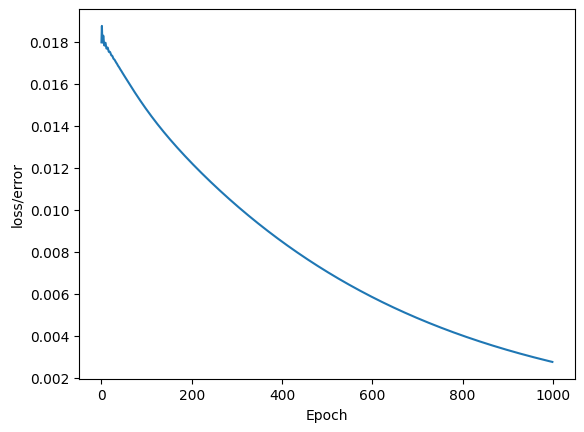

In [45]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [46]:
#Evaluate MOdel on Test Data Set(validate model on test set)
with torch.no_grad():#Basically turn off back propagation
  y_eval =  model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval,  y_test)  #Creates a criterion that measures the
  # mean squared error (squared L2 norm) between each element in the input x and target y. This criterion computes the cross entropy loss between input logits and target.



In [47]:
loss

tensor(0.3671)

In [48]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    if y_test[i] == 0:
      x='Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x= 'Virginica'

    #Will tesll us what type of flower class our network thinks  it is
    print(f'{(i+1)}   {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    #y_val.argmax() will tell us the prediction
    if y_val.argmax().item() == y_test[i]:
      correct+=1

print(f'we got {correct} correct')

1   tensor([-17.6510,   2.3688,  11.8626]) 	 2 	 2
2   tensor([-27.9287,  -8.3234,  31.6968]) 	 2 	 2
3   tensor([-32.5329,  -9.8242,  37.0408]) 	 2 	 2
4   tensor([-7.9260, 10.3566, -4.9260]) 	 1 	 1
5   tensor([-25.3683,  -3.9816,  24.9531]) 	 2 	 2
6   tensor([-4.3409, 11.8151, -9.6982]) 	 1 	 1
7   tensor([-18.3582,   2.8705,  11.8958]) 	 2 	 2
8   tensor([-7.8892, 10.3456, -4.9449]) 	 1 	 1
9   tensor([-21.6655,  -0.4405,  18.1434]) 	 2 	 2
10   tensor([-30.1900,  -9.5576,  34.8306]) 	 2 	 2
11   tensor([-16.2090,   4.7298,   8.1644]) 	 2 	 2
12   tensor([ 23.5200,   8.5533, -38.9321]) 	 0 	 0
13   tensor([ 21.6806,   7.9322, -35.9437]) 	 0 	 0
14   tensor([  0.6081,  11.8362, -13.9883]) 	 1 	 1
15   tensor([ 19.8036,   9.3786, -35.0096]) 	 0 	 0
16   tensor([-13.4930,   8.0670,   2.3799]) 	 2 	 1
17   tensor([ 21.6088,   8.4269, -36.3547]) 	 0 	 0
18   tensor([-16.3383,   3.8898,   9.1756]) 	 1 	 2
19   tensor([ 25.2482,   7.8643, -40.4478]) 	 0 	 0
20   tensor([ 18.1999,   8.901